# Evaluating the performance of denoisining techniques
Here, plot the results of all denoising techniques, and generate figures for the article

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# get wavenumbers for plotting spectra
with open('axis.txt') as file:
    wavenumbers = [float(line.rstrip()) for line in file]

In [3]:
# plot training losses for denoising cyclegan

Text(0.5, 1.0, 'Denoising cycleGAN Training Losses')

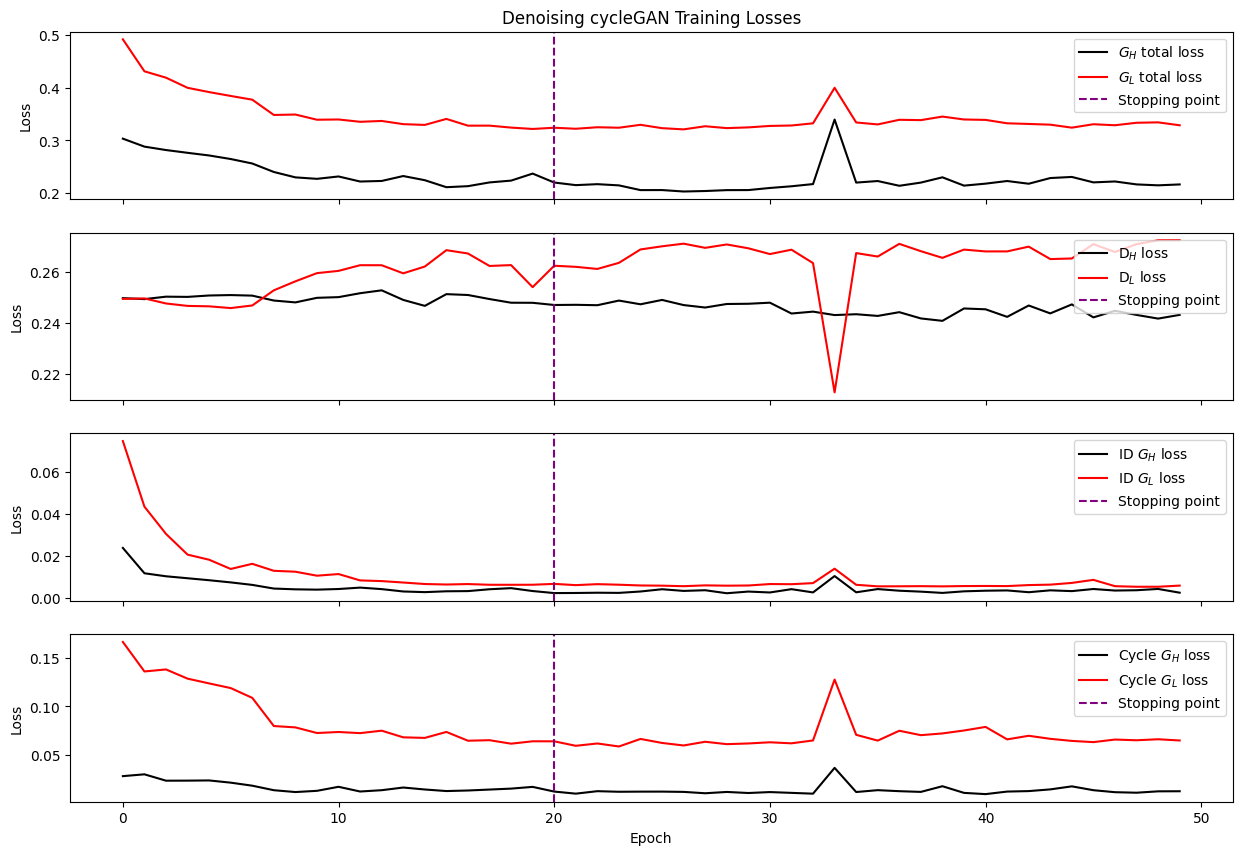

In [4]:
history=np.load('my_history.npy',allow_pickle='TRUE').item()
fig, ax = plt.subplots(4,1,figsize=(15, 10),sharex=True)

ax[0].plot(history['G_loss'],label='$G_H$ total loss', color = 'black')
ax[0].plot(history['F_loss'],label='$G_L$ total loss', color = 'red')
ax[0].axvline(x=20,ls='--',color='purple',label = 'Stopping point')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper right')
ax[1].plot(history['D_X_loss'],label='D$_H$ loss', color = 'black')
ax[1].plot(history['D_Y_loss'],label='D$_L$ loss', color = 'red')
ax[1].set_ylabel('Loss')
ax[1].axvline(x=20,ls='--',color='purple',label = 'Stopping point')
ax[1].legend(loc='upper right')
ax[2].plot(history['ID_G_loss'],label='ID $G_H$ loss', color = 'black')
ax[2].plot(history['ID_F_loss'],label='ID $G_L$ loss', color = 'red')
ax[2].set_ylabel('Loss')
ax[2].axvline(x=20,ls='--',color='purple',label = 'Stopping point')
ax[2].legend(loc='upper right')
ax[3].plot(history['Cycle_G_loss'],label='Cycle $G_H$ loss', color = 'black')
ax[3].plot(history['Cycle_F_loss'],label='Cycle $G_L$ loss', color = 'red')
ax[3].set_ylabel('Loss')
ax[3].axvline(x=20,ls='--',color='purple',label = 'Stopping point')
ax[3].legend(loc='upper right')
ax[-1].set_xlabel('Epoch')
ax[0].set_title('Denoising cycleGAN Training Losses')



In [5]:
# Plot validation losses

In [6]:
unsupervised_valid_loss = []
supervised_valid_loss = []
for i in range((50)):
    unsupervised_valid_loss.append(np.load('./epoch_' + str(i) + '/valid_loss_' + str(i) + '.npy'))
    supervised_valid_loss.append(np.load('./epoch_' + str(i) + '/valid_loss_sup_' + str(i) + '.npy'))

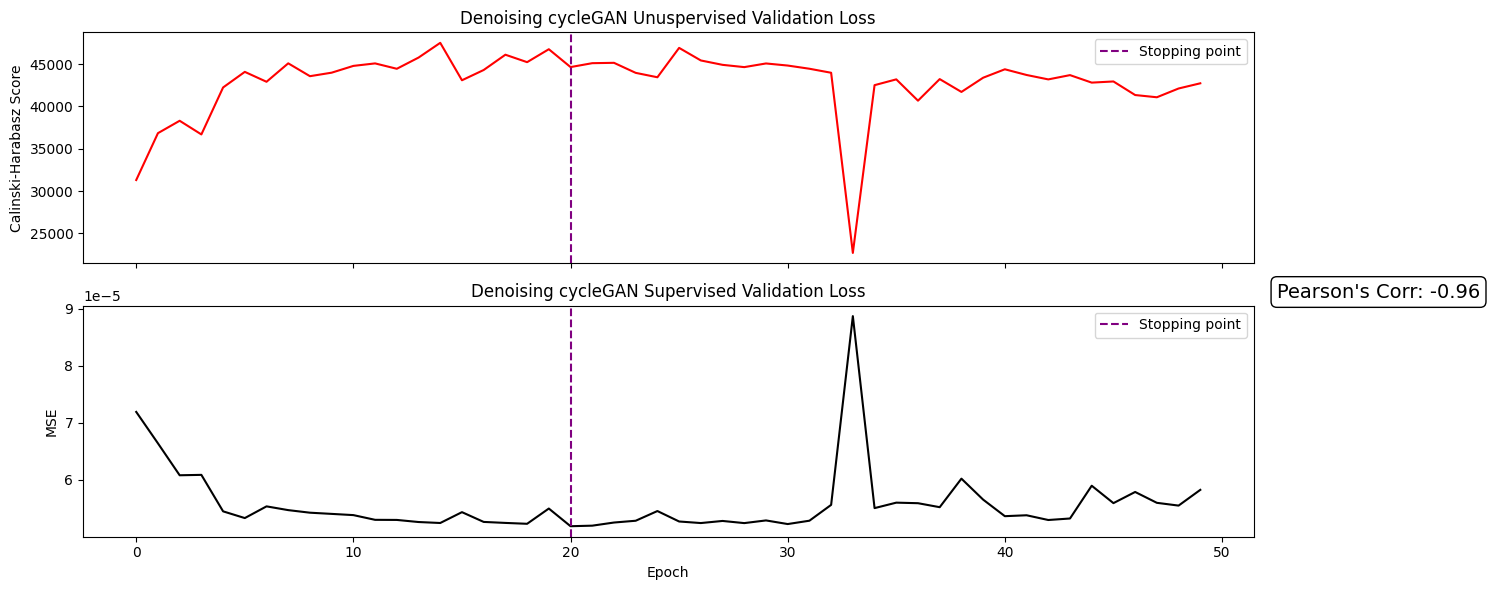

In [7]:
# compute Pearson correlation between unsupervised and supervised validation losses
corr, _ = pearsonr(unsupervised_valid_loss, supervised_valid_loss)

# plot validation losses
fig, ax = plt.subplots(2,sharex=True,figsize=(15, 6))

ax[0].plot(unsupervised_valid_loss,color='red')
ax[0].set_title('Denoising cycleGAN Unuspervised Validation Loss')
ax[0].set_ylabel('Calinski-Harabasz Score')
ax[0].axvline(x=20,ls='--',color='purple',label = 'Stopping point')
ax[0].legend()
ax[1].plot(supervised_valid_loss,color='black')
ax[1].set_title('Denoising cycleGAN Supervised Validation Loss')
ax[1].set_ylabel('MSE')
ax[1].set_xlabel('Epoch')
textstr = "Pearson's Corr: " + str(np.round(corr,2))
ax[1].text(1.02, 1.1, textstr, transform=ax[1].transAxes, fontsize=14,
        verticalalignment='top',color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))
ax[1].axvline(x=20,ls='--',color='purple',label = 'Stopping point')
ax[1].legend()
fig.tight_layout()

Text(0, 0.5, 'MSE')

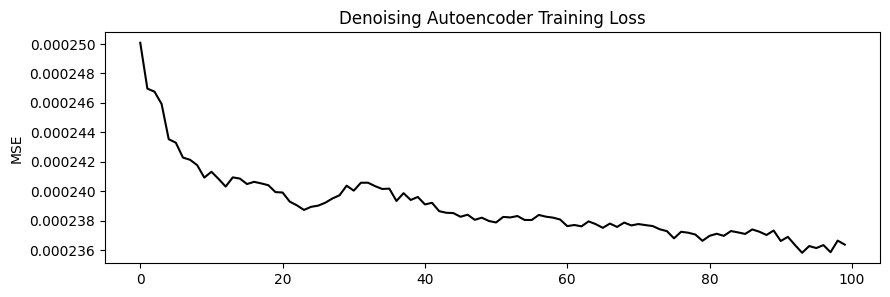

In [8]:
#plot losses for the AE
history=np.load('/hdd/ciaran_storage/spectra3_unsup_AE_2_high_lr/my_history.npy',allow_pickle='TRUE').item()
fig, ax = plt.subplots(1,figsize=(10, 3),sharex=True)

ax.plot(history['AE_loss'],label='$AE$ loss', color = 'black')

ax.set_title('Denoising Autoencoder Training Loss')
ax.set_ylabel('MSE')



In [9]:
unsupervised_valid_loss = []
supervised_valid_loss = []
AE_trad_valid_loss = []
for i in range((97)):
    unsupervised_valid_loss.append(np.load('/hdd/ciaran_storage/spectra3_unsup_AE_2_high_lr/epoch_' + str(i) + '/AE_valid_loss_' + str(i) + '.npy'))
    supervised_valid_loss.append(np.load('/hdd/ciaran_storage/spectra3_unsup_AE_2_high_lr/epoch_' + str(i) + '/AE_valid_loss_sup_' + str(i) + '.npy'))
    AE_trad_valid_loss.append(np.load('/hdd/ciaran_storage/spectra3_unsup_AE_2_high_lr/epoch_' + str(i) + '/valid_loss_trad_AE_' + str(i) + '.npy'))

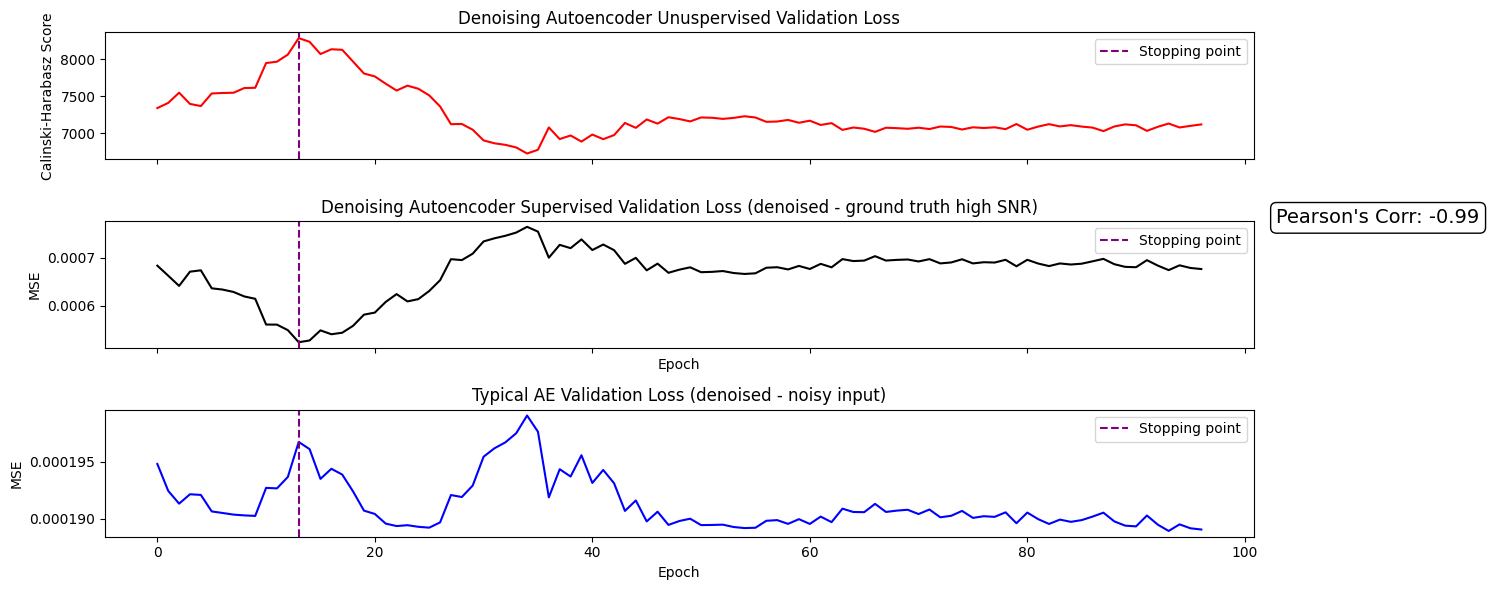

In [10]:
# compute Pearson correlation between unsupervised and supervised validation losses
corr, _ = pearsonr(unsupervised_valid_loss, supervised_valid_loss)

fig, ax = plt.subplots(3,sharex=True,figsize=(15, 6))

ax[0].plot(unsupervised_valid_loss,color='red')
ax[0].set_title('Denoising Autoencoder Unuspervised Validation Loss')
ax[0].set_ylabel('Calinski-Harabasz Score')
ax[0].axvline(x=13,ls='--',color='purple',label = 'Stopping point')
ax[0].legend()
ax[1].plot(supervised_valid_loss,color='black')
ax[1].set_title('Denoising Autoencoder Supervised Validation Loss (denoised - ground truth high SNR)')
ax[1].set_ylabel('MSE')
ax[1].set_xlabel('Epoch')
textstr = "Pearson's Corr: " + str(np.round(corr,2))
ax[1].text(1.02, 1.1, textstr, transform=ax[1].transAxes, fontsize=14,
        verticalalignment='top',color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))
ax[1].axvline(x=13,ls='--',color='purple',label = 'Stopping point')
ax[1].legend()

ax[2].plot(AE_trad_valid_loss,color='blue')
ax[2].set_title('Typical AE Validation Loss (denoised - noisy input)')
ax[2].set_ylabel('MSE')
ax[2].set_xlabel('Epoch')
ax[2].axvline(x=13,ls='--',color='purple',label = 'Stopping point')
ax[2].legend()
fig.tight_layout()

In [11]:
## Load in classically denoised spectra with corresponding parameters and cycleGAN network denoised spectra

In [12]:
wav = np.load('wavelet_spectra.npy',allow_pickle=True)
wav_params = np.load('wavelet_spectra_params.npy',allow_pickle=True)
#pc = np.load('PCA_spectra.npy',allow_pickle=True)
#pc_params = np.load('PCA_spectra_params.npy',allow_pickle=True)
sg = np.load('SG_spectra.npy',allow_pickle=True)
sg_params = np.load('SG_spectra_params.npy',allow_pickle=True)
gt = np.load('network_pred_GT_corrected_normalised.npy',allow_pickle=True)
pred = np.load('network_pred_corrected_normalised.npy',allow_pickle=True)
net_input = np.load('network_input_corrected_normalised.npy',allow_pickle=True)
W = np.load('W_spectra.npy',allow_pickle=True)
W_params = np.load('W_spectra_params.npy',allow_pickle=True)
AE = np.load('/hdd/ciaran_storage/spectra3_unsup_AE_2_high_lr/AE_pred_corrected_normalised.npy',allow_pickle=True)

In [13]:
#compute cyclegan denoised spectra MSE

In [14]:
net_pred_MSE =np.mean(np.mean((pred - gt)**2,axis=1))
net_pred_std=np.std(np.mean((pred - gt)**2,axis=1))


print(net_pred_MSE)
print(net_pred_std)

0.0037269136618614646
0.002239751899715681


In [15]:
#compute autoencoder denoised spectra MSE

In [16]:
AE_pred_MSE =np.mean(np.mean((AE - gt)**2,axis=1))
AE_pred_std=np.std(np.mean((AE - gt)**2,axis=1))


print(AE_pred_MSE)
print(AE_pred_std)

0.011534924603385626
0.01064636962942542


In [17]:
#compute wavelet denoised MSE

In [18]:
wav_MSEs = []
wav_stds = []
for i in range(np.shape(wav)[0]):
    wav_MSEs.append(np.mean(np.mean((wav[i] - gt)**2,axis=1)))
    wav_stds.append(np.std(np.mean((wav[i] - gt)**2,axis=1)))
wav_index = np.where(wav_MSEs==np.min(wav_MSEs))
wave_MSE_plot = np.min(wav_MSEs)
wave_std_plot = wav_stds[int(np.squeeze(wav_index))]

In [19]:
#compute Wiener denoised MSE

In [20]:
W_MSEs = []
W_stds = []
for i in range(np.shape(W)[0]):
    W_MSEs.append(np.mean(np.mean((W[i] - gt)**2,axis=1)))
    W_stds.append(np.std(np.mean((W[i] - gt)**2,axis=1)))
W_index = np.where(W_MSEs==np.min(W_MSEs))
W_MSE_plot = np.min(W_MSEs)
W_std_plot = W_stds[int(np.squeeze(W_index))]

In [21]:
#compute SG denoised MSE

In [22]:
SG_MSEs = []
SG_stds = []
for i in range(np.shape(sg)[0]):
    SG_MSEs.append(np.mean(np.mean((sg[i] - gt)**2,axis=1)))
    SG_stds.append(np.std(np.mean((sg[i] - gt)**2,axis=1)))
sg_index = np.where(SG_MSEs==np.min(SG_MSEs))
sg_MSE_plot = np.min(SG_MSEs)
sg_std_plot = SG_stds[int(np.squeeze(sg_index))]



In [23]:
sg_MSE_plot

0.011207943838577062

Text(0.5, 1.0, 'TMMSE for all denoisining techniques')

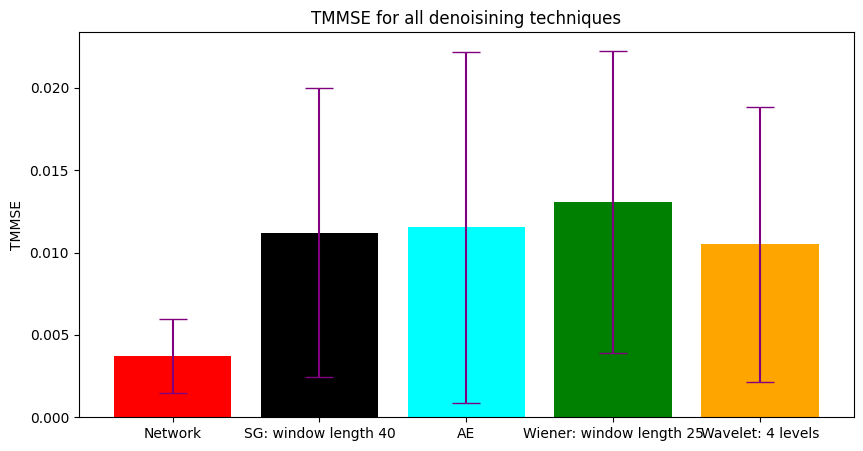

In [24]:
f, ax = plt.subplots(figsize=(10,5))
plt.bar(['Network','SG: window length ' + str(int(sg_params[sg_index])), 'AE', 'Wiener: window length ' + str(int(W_params[W_index])), 'Wavelet: ' + str(int(wav_params[wav_index])) + ' levels'],[net_pred_MSE,sg_MSE_plot, AE_pred_MSE, W_MSE_plot, wave_MSE_plot],yerr = [net_pred_std, sg_std_plot, AE_pred_std, W_std_plot, wave_std_plot],ecolor='purple', capsize=10,color=['red', 'black', 'cyan', 'green', 'orange'])
plt.ylabel('TMMSE')
plt.title('TMMSE for all denoisining techniques')


In [25]:
# plot performance of all classical techniques vs parameterisations

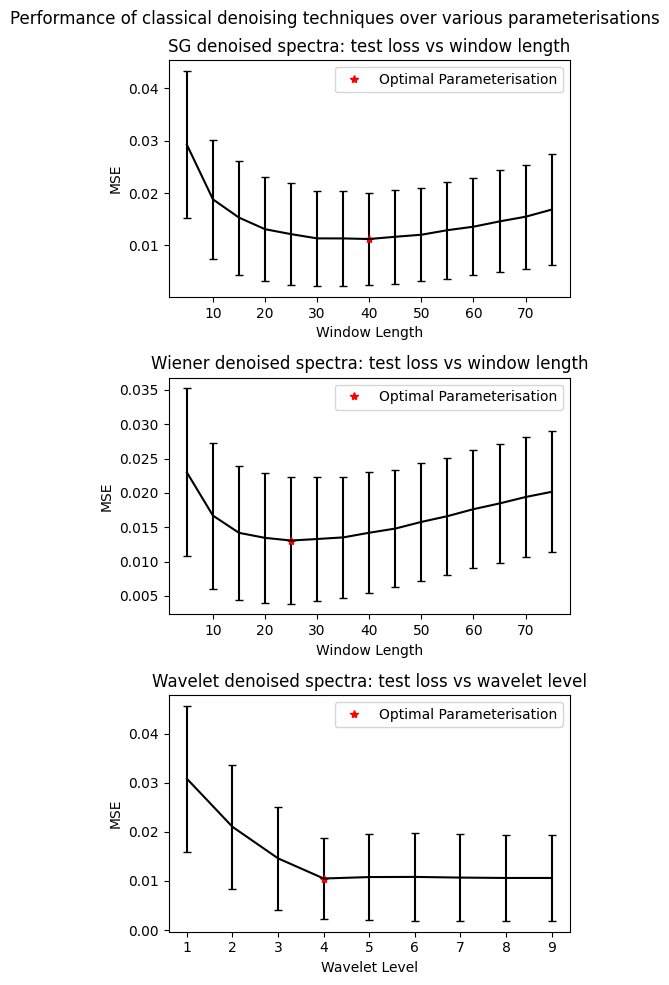

In [26]:
fig, ax = plt.subplots(3,1,figsize=(5, 10))

#ax[0].plot(sg_params, SG_MSEs)
ax[0].errorbar(sg_params, SG_MSEs, SG_stds, capsize=3,color='black')
ax[0].plot(sg_params[int(np.squeeze(sg_index))], SG_MSEs[int(np.squeeze(sg_index))], 'r*', label = 'Optimal Parameterisation')
ax[0].set_xlabel('Window Length')
ax[0].set_ylabel('MSE')
ax[0].set_title('SG denoised spectra: test loss vs window length')
ax[0].legend()
#ax[1].errorbar(pc_params,PCA_MSEs,PCA_stds, capsize=3,color='black')
#ax[1].plot(pc_params[int(np.squeeze(pc_index))], PCA_MSEs[int(np.squeeze(pc_index))], 'r*', label = 'Optimal Parameterisation')
#ax[1].set_xlabel('PCs')
#ax[1].set_ylabel('MSE')
#ax[1].set_title('PCA denoised spectra: test loss vs number of PCs')
#ax[1].legend()
ax[1].errorbar(W_params,W_MSEs,W_stds, capsize=3,color='black')
ax[1].plot(W_params[int(np.squeeze(W_index))], W_MSEs[int(np.squeeze(W_index))], 'r*', label = 'Optimal Parameterisation')
ax[1].set_xlabel('Window Length')
ax[1].set_ylabel('MSE')
ax[1].set_title('Wiener denoised spectra: test loss vs window length')
ax[1].legend()
ax[2].errorbar(np.squeeze(wav_params),np.squeeze(wav_MSEs),wav_stds, capsize=3,color='black')
ax[2].plot(wav_params[int(np.squeeze(wav_index))], wav_MSEs[int(np.squeeze(wav_index))], 'r*', label = 'Optimal Parameterisation')
ax[2].set_xlabel('Wavelet Level')
ax[2].set_ylabel('MSE')
ax[2].set_title('Wavelet denoised spectra: test loss vs wavelet level')
ax[2].legend()
fig.suptitle('Performance of classical denoising techniques over various parameterisations')
fig.tight_layout()

In [27]:
# plot example denoised spectra for all techniques based on optimal paramaterisation derived from TMMSE

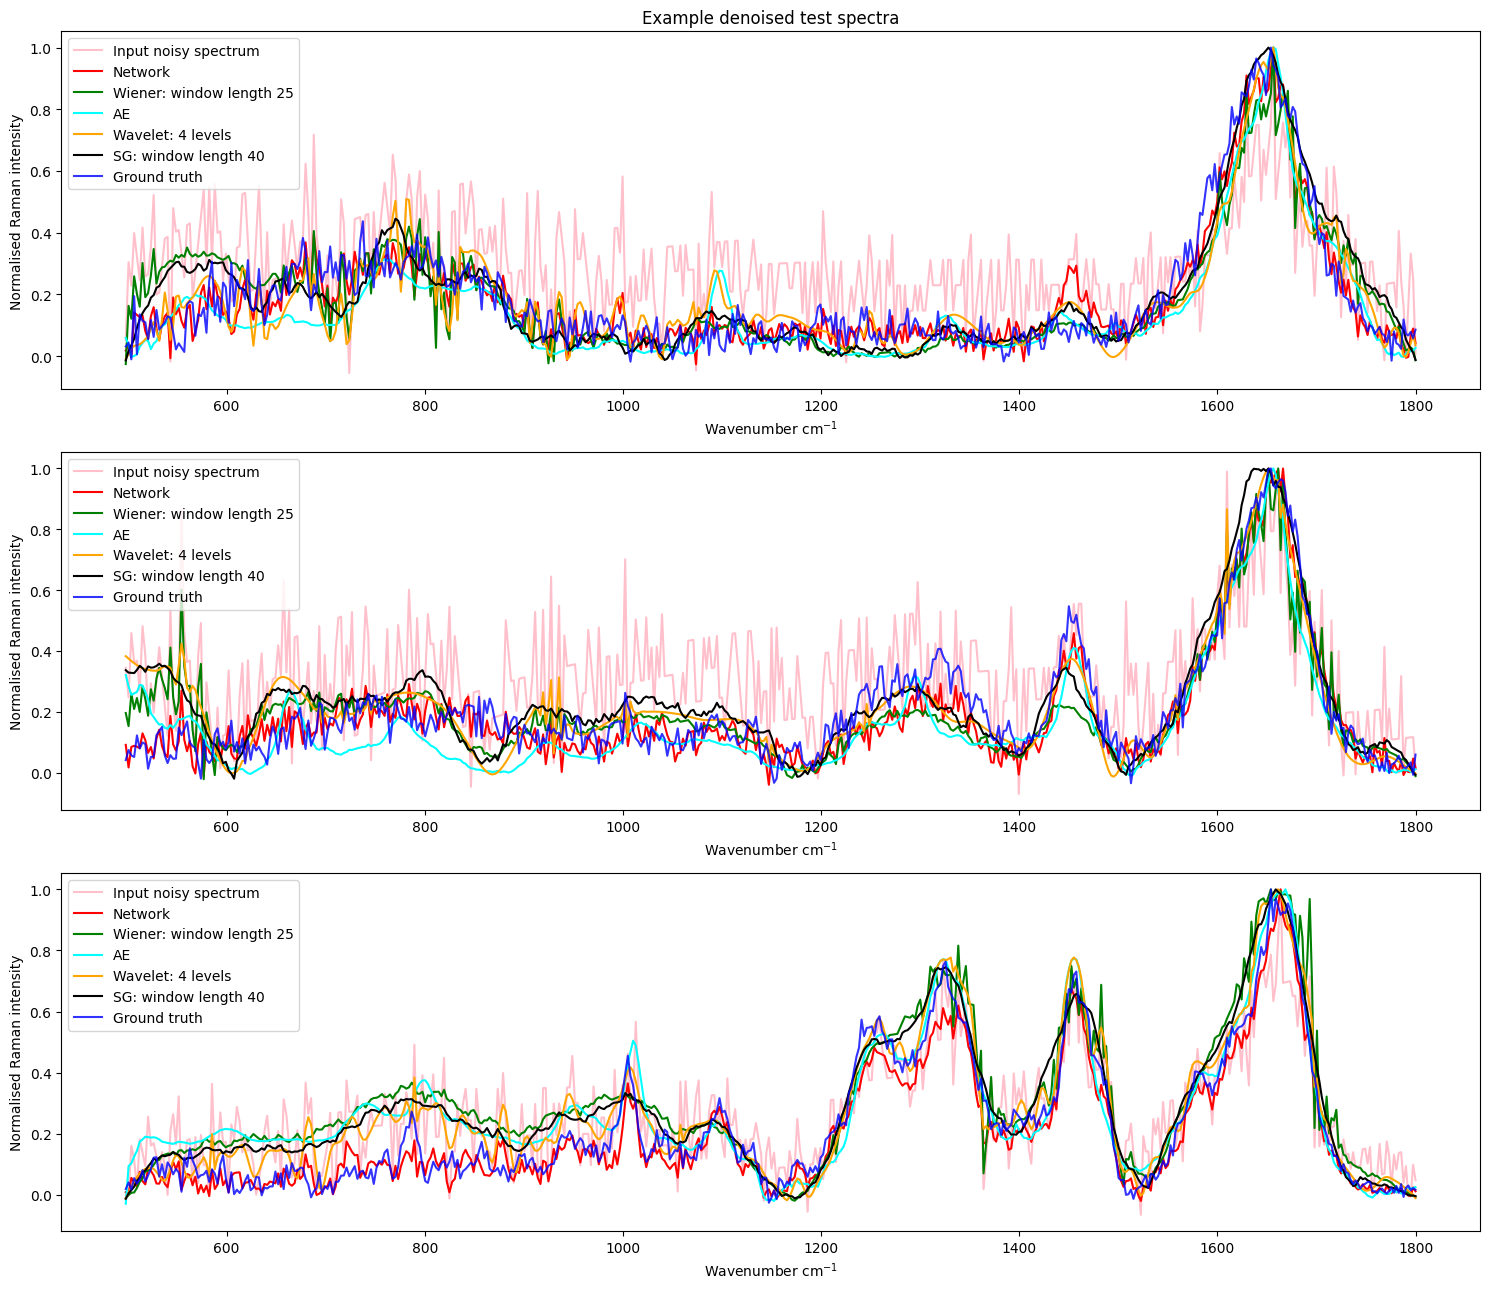

In [28]:
example_inds=[5000,3000,10000]
plot_num=3
fig, ax = plt.subplots(plot_num,figsize=(15, 13))
for i in range(plot_num):
    index = example_inds[i]
    ax[i].plot(wavenumbers, np.squeeze(net_input[index]), label='Input noisy spectrum',color="pink")
    ax[i].plot(wavenumbers, np.squeeze(pred[index]), label='Network',color="red")
    ax[i].plot(wavenumbers, np.squeeze(W[W_index,index]), label='Wiener: window length ' + str(int(W_params[W_index])),color="green")
    ax[i].plot(wavenumbers, np.squeeze(AE[index]), label='AE',color="cyan")
    ax[i].plot(wavenumbers, np.squeeze(wav[wav_index,index]), label='Wavelet: ' + str(int(wav_params[wav_index])) + ' levels',color="orange")
    ax[i].plot(wavenumbers, np.squeeze(sg[sg_index,index]), label='SG: window length ' + str(int(sg_params[sg_index])),color="black")
    ax[i].plot(wavenumbers, gt[index],label='Ground truth',alpha=0.8,color="blue")
    ax[i].legend(loc='upper left')
    ax[i].set_ylabel('Normalised Raman intensity')
    ax[i].set_xlabel('Wavenumber cm$^{-1}$')
ax[0].set_title('Example denoised test spectra')
fig.tight_layout()

In [29]:
# MCSE calculations

In [30]:
# Determine the optimal cluster number for inferring test spectra classes
# this is used to calculate the per-cluster MSE to account for class imbalances
# during evaluation
'''
network_pred_GT = np.load('./epoch_20/network_denoised_GT.npy')
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import numpy as np
import matplotlib.pyplot as plt

scores = []
cluster_nums = range(2,20,2)
for i in range(2,20,2):
    kmeans_model = KMeans(n_clusters=i, random_state=4).fit(network_pred_GT)
    labels = kmeans_model.labels_
    scores.append(metrics.calinski_harabasz_score(network_pred_GT, labels))
'''

"\nnetwork_pred_GT = np.load('./epoch_20/network_denoised_GT.npy')\nfrom sklearn import metrics\nfrom sklearn.cluster import KMeans\nfrom sklearn.metrics import pairwise_distances\nfrom sklearn.metrics import davies_bouldin_score\nfrom sklearn.metrics import silhouette_score\nfrom sklearn.metrics import calinski_harabasz_score\nimport numpy as np\nimport matplotlib.pyplot as plt\n\nscores = []\ncluster_nums = range(2,20,2)\nfor i in range(2,20,2):\n    kmeans_model = KMeans(n_clusters=i, random_state=4).fit(network_pred_GT)\n    labels = kmeans_model.labels_\n    scores.append(metrics.calinski_harabasz_score(network_pred_GT, labels))\n"

In [31]:
# plt.plot(cluster_nums,scores)
# plt.xlabel('Cluster number')
# plt.ylabel('Calinski Harabasz Score')

In [32]:
# cluster the low SNR test spectra to infer the class of each example in the test set
from sklearn.cluster import KMeans
network_pred_GT = np.load('./epoch_20/network_denoised_GT.npy')

kmeans_model = KMeans(n_clusters=8, random_state=4).fit(network_pred_GT)
labels = kmeans_model.labels_

/home/ciaran/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
# Calculate error metrics

In [34]:
# wavelet
wav_MSEs = []
wav_stds = []
wav_class_mean_MSEs = []
wav_class_std_MSEs = []
for i in range(np.shape(wav)[0]):
    wav_MSEs.append(np.mean(np.mean((wav[i] - gt)**2,axis=1)))
    wav_stds.append(np.std(np.mean((wav[i] - gt)**2,axis=1)))
    MSE_class = []
    for j in np.unique(labels):
        cluster_indices = np.where(labels == j)
        MSE_class.append(np.mean(np.mean((wav[i][cluster_indices] - gt[cluster_indices])**2,axis=1)))
    wav_class_mean_MSEs.append(np.mean(MSE_class))
    wav_class_std_MSEs.append(np.std(MSE_class))
        
wav_index_class = np.where(wav_class_mean_MSEs==np.min(wav_class_mean_MSEs))          
wav_index = np.where(wav_MSEs==np.min(wav_MSEs))
wave_mse_plot = wav_MSEs[int(np.squeeze(wav_index_class))]
wave_std_plot = wav_stds[int(np.squeeze(wav_index_class))]
wave_mse_plot_class = wav_class_mean_MSEs[int(np.squeeze(wav_index_class))]
wave_std_plot_class = wav_class_std_MSEs[int(np.squeeze(wav_index_class))]

In [35]:
# wiener
W_MSEs = []
W_stds = []
W_class_mean_MSEs = []
W_class_std_MSEs = []
for i in range(np.shape(W)[0]):
    W_MSEs.append(np.mean(np.mean((W[i] - gt)**2,axis=1)))
    W_stds.append(np.std(np.mean((W[i] - gt)**2,axis=1)))
    MSE_class = []
    for j in np.unique(labels):
        cluster_indices = np.where(labels == j)
        MSE_class.append(np.mean(np.mean((W[i][cluster_indices] - gt[cluster_indices])**2,axis=1)))
    W_class_mean_MSEs.append(np.mean(MSE_class))
    W_class_std_MSEs.append(np.std(MSE_class))
        
W_index_class = np.where(W_class_mean_MSEs==np.min(W_class_mean_MSEs))      
W_index = np.where(W_MSEs==np.min(W_MSEs))
W_mse_plot = W_MSEs[int(np.squeeze(W_index_class))]
W_std_plot = W_stds[int(np.squeeze(W_index_class))]
W_mse_plot_class = W_class_mean_MSEs[int(np.squeeze(W_index_class))]
W_std_plot_class = W_class_std_MSEs[int(np.squeeze(W_index_class))]

In [36]:
# sav golay
SG_MSEs = []
SG_stds = []
SG_class_mean_MSEs = []
SG_class_std_MSEs = []
for i in range(np.shape(sg)[0]):
    SG_MSEs.append(np.mean(np.mean((sg[i] - gt)**2,axis=1)))
    SG_stds.append(np.std(np.mean((sg[i] - gt)**2,axis=1)))
    MSE_class = []
    for j in np.unique(labels):
        cluster_indices = np.where(labels == j)
        MSE_class.append(np.mean(np.mean((sg[i][cluster_indices] - gt[cluster_indices])**2,axis=1)))
    SG_class_mean_MSEs.append(np.mean(MSE_class))
    SG_class_std_MSEs.append(np.std(MSE_class))

sg_index_class = np.where(SG_class_mean_MSEs==np.min(SG_class_mean_MSEs))    
sg_index = np.where(SG_MSEs==np.min(SG_MSEs))
sg_mse_plot = SG_MSEs[int(np.squeeze(sg_index_class))]
sg_std_plot = SG_stds[int(np.squeeze(sg_index_class))]
sg_mse_plot_class = SG_class_mean_MSEs[int(np.squeeze(sg_index_class))]
sg_std_plot_class = SG_class_std_MSEs[int(np.squeeze(sg_index_class))]

In [37]:
# cyclegan predicted
MSE_class = []
for j in np.unique(labels):
    cluster_indices = np.where(labels == j)
    MSE_class.append(np.mean(np.mean((pred[cluster_indices] - gt[cluster_indices])**2,axis=1)))
net_class_mean_MSEs=np.mean(MSE_class)
net_class_std_MSEs=np.std(MSE_class)
 

net_mse_plot_class = net_class_mean_MSEs
net_std_plot_class = net_class_std_MSEs

In [60]:
# AE predicted
MSE_class = []
for j in np.unique(labels):
    cluster_indices = np.where(labels == j)
    MSE_class.append(np.mean(np.mean((AE[cluster_indices] - gt[cluster_indices])**2,axis=1)))
AE_class_mean_MSEs=np.mean(MSE_class)
AE_class_std_MSEs=np.std(MSE_class)
 

AE_mse_plot_class = AE_class_mean_MSEs
AE_std_plot_class = AE_class_std_MSEs

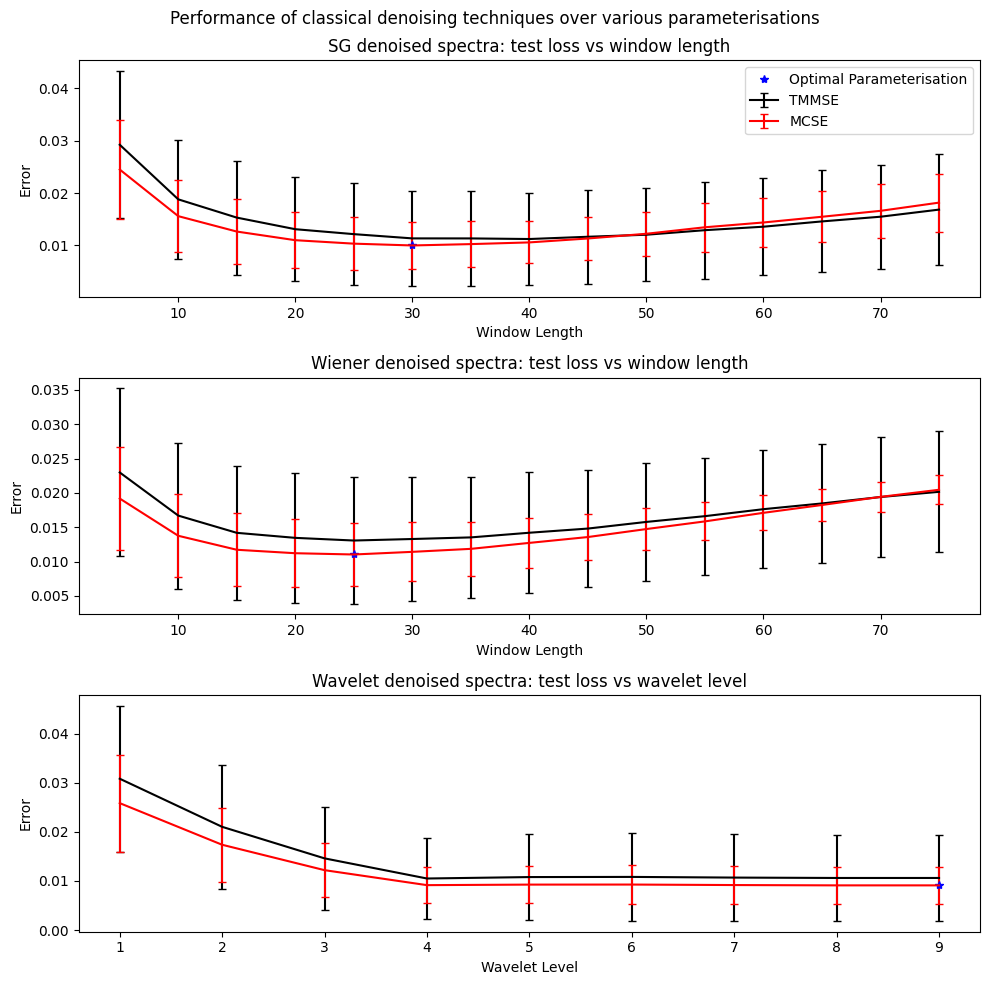

In [61]:
# plot error metrics vs parameterisation

fig, ax = plt.subplots(3,1,figsize=(10, 10))

#ax[0].plot(sg_params, SG_MSEs)
ax[0].errorbar(sg_params, SG_MSEs, SG_stds, capsize=3,color='black',label = 'TMMSE')
ax[0].errorbar(sg_params, SG_class_mean_MSEs, SG_class_std_MSEs, capsize=3,color='red', label = 'MCSE')
ax[0].plot(sg_params[int(np.squeeze(sg_index_class))], SG_class_mean_MSEs[int(np.squeeze(sg_index_class))], 'b*', label = 'Optimal Parameterisation')
#ax[0].axvline(x=sg_params[int(np.squeeze(sg_index_class))],ls='--',color='purple',label = 'Optimal Parameterisation')
ax[0].set_xlabel('Window Length')
ax[0].set_ylabel('Error')
ax[0].set_title('SG denoised spectra: test loss vs window length')
ax[0].legend(loc = 'upper right')

ax[1].errorbar(W_params,W_MSEs,W_stds, capsize=3,color='black',label = 'TMMSE')
ax[1].errorbar(W_params, W_class_mean_MSEs, W_class_std_MSEs, capsize=3,color='red', label = 'MCSEs')
ax[1].plot(W_params[int(np.squeeze(W_index_class))], W_class_mean_MSEs[int(np.squeeze(W_index_class))], 'b*', label = 'Optimal Parameterisation')
#ax[1].axvline(x=pc_params[int(np.squeeze(pc_index_class))],ls='--',color='purple',label = 'Optimal Parameterisation')
ax[1].set_xlabel('Window Length')
ax[1].set_ylabel('Error')
ax[1].set_title('Wiener denoised spectra: test loss vs window length')
#ax[1].legend(bbox_to_anchor=(1.01, 1.01))



ax[2].errorbar(np.squeeze(wav_params),np.squeeze(wav_MSEs),wav_stds, capsize=3,color='black',label = 'TMMSE')
ax[2].errorbar(wav_params, wav_class_mean_MSEs, wav_class_std_MSEs, capsize=3,color='red', label = 'MCSE')
ax[2].plot(wav_params[int(np.squeeze(wav_index_class))], wav_class_mean_MSEs[int(np.squeeze(wav_index_class))], 'b*', label = 'Optimal Parameterisation')
#ax[2].axvline(x=wav_params[int(np.squeeze(wav_index_class))],ls='--',color='purple',label = 'Optimal Parameterisation')
ax[2].set_xlabel('Wavelet Level')
ax[2].set_ylabel('Error')
ax[2].set_title('Wavelet denoised spectra: test loss vs wavelet level')
#ax[2].legend(loc = 'upper right')
fig.suptitle('Performance of classical denoising techniques over various parameterisations')
fig.tight_layout()

Text(0.5, 1.0, 'MCSE for all denoisining techniques')

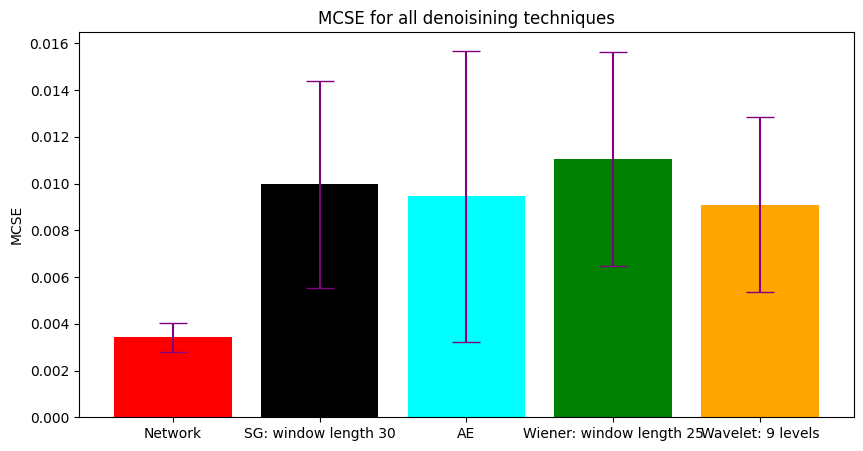

In [62]:
# plot mcse 
f, ax = plt.subplots(figsize=(10,5))
plt.bar(['Network','SG: window length ' + str(int(sg_params[sg_index_class])), 'AE', 'Wiener: window length ' + str(int(W_params[W_index_class])), 'Wavelet: ' + str(int(wav_params[wav_index_class])) + ' levels'],[net_mse_plot_class,sg_mse_plot_class, AE_mse_plot_class, W_mse_plot_class, wave_mse_plot_class],yerr = [net_std_plot_class, sg_std_plot_class, AE_std_plot_class, W_std_plot_class, wave_std_plot_class],ecolor='purple', capsize=10,color=['red', 'black', 'cyan', 'green', 'orange'])
plt.ylabel('MCSE')
plt.title('MCSE for all denoisining techniques')


In [63]:
print([net_mse_plot_class,sg_mse_plot_class, AE_mse_plot_class, W_mse_plot_class, wave_mse_plot_class])

[0.003418925004894762, 0.009976480593468732, 0.009464694557832462, 0.011040412662865592, 0.009092340067086624]


In [64]:
# replot TMMSE

Text(0.5, 1.0, 'TMMSE for all denoising techniques')

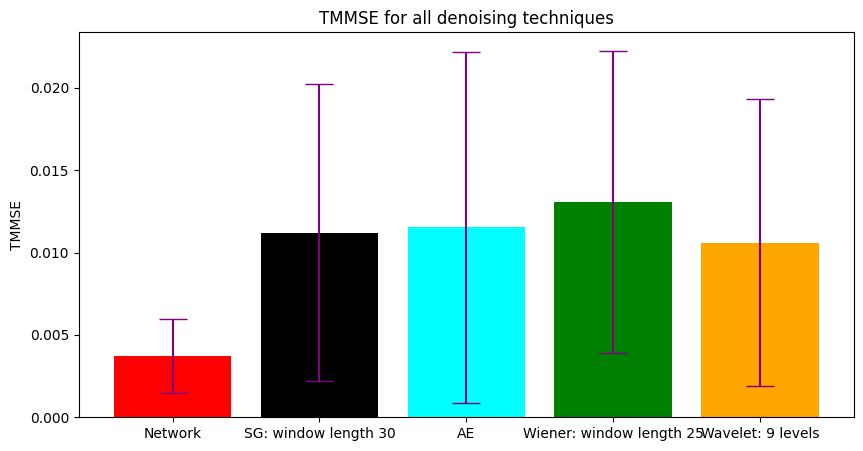

In [65]:
f, ax = plt.subplots(figsize=(10,5))
plt.bar(['Network','SG: window length ' + str(int(sg_params[sg_index_class])), 'AE', 'Wiener: window length ' + str(int(W_params[W_index_class])), 'Wavelet: ' + str(int(wav_params[wav_index_class])) + ' levels'],[net_pred_MSE,sg_MSE_plot, AE_pred_MSE, W_mse_plot, wave_mse_plot],yerr = [net_pred_std, sg_std_plot, AE_pred_std, W_std_plot, wave_std_plot],ecolor='purple', capsize=10,color=['red', 'black', 'cyan', 'green', 'orange'])
plt.ylabel('TMMSE')
plt.title('TMMSE for all denoising techniques')


In [43]:
# plot example spectra for all techniques, using parameterisations derived from MCSE

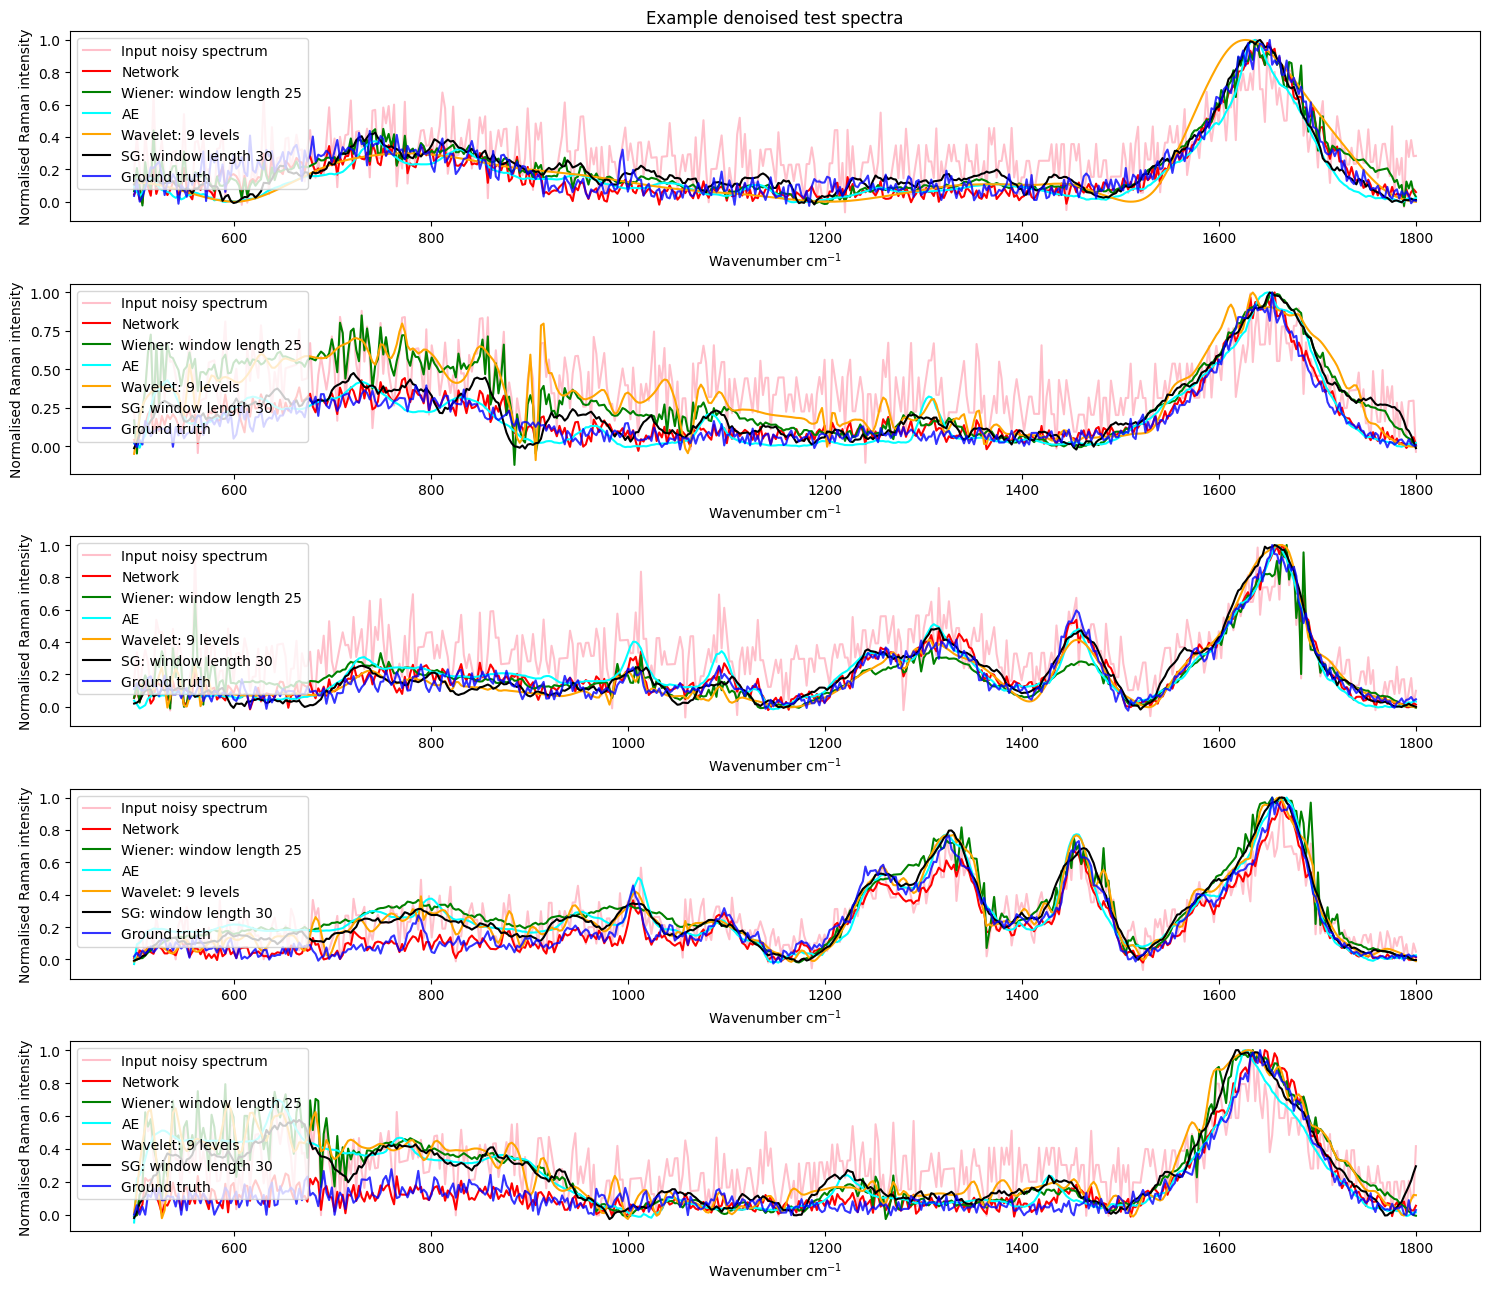

In [44]:
example_inds=[3000,10000,5000,9000,100]

example_inds=[22,2333,4775,10000,6699]

plot_num=len(example_inds)
fig, ax = plt.subplots(plot_num,figsize=(15, 13))
for i in range(plot_num):
    index = example_inds[i]
    #plt.plot(net_input[index],label='Input noisy')
    ax[i].plot(wavenumbers, np.squeeze(net_input[index]), label='Input noisy spectrum',color="pink")
    ax[i].plot(wavenumbers, np.squeeze(pred[index]), label='Network',color="red")
    ax[i].plot(wavenumbers, np.squeeze(W[W_index_class,index]), label='Wiener: window length ' + str(int(W_params[W_index_class])),color="green")
    ax[i].plot(wavenumbers, np.squeeze(AE[index]), label='AE',color="cyan")
    ax[i].plot(wavenumbers, np.squeeze(wav[wav_index_class,index]), label='Wavelet: ' + str(int(wav_params[wav_index_class])) + ' levels',color="orange")
    ax[i].plot(wavenumbers, np.squeeze(sg[sg_index_class,index]), label='SG: window length ' + str(int(sg_params[sg_index_class])),color="black")
    ax[i].plot(wavenumbers, gt[index],label='Ground truth',alpha=0.8,color="blue")
    ax[i].legend(loc='upper left')
    ax[i].set_ylabel('Normalised Raman intensity')
    ax[i].set_xlabel('Wavenumber cm$^{-1}$')
ax[0].set_title('Example denoised test spectra')
fig.tight_layout()

# plots for netowrk data flow figure...

In [45]:
network_pred=np.load('./epoch_20/network_denoised.npy')
network_pred_GT = np.load('./epoch_20/network_denoised_GT.npy')
network_pred_input = np.load('./epoch_20/network_input.npy')

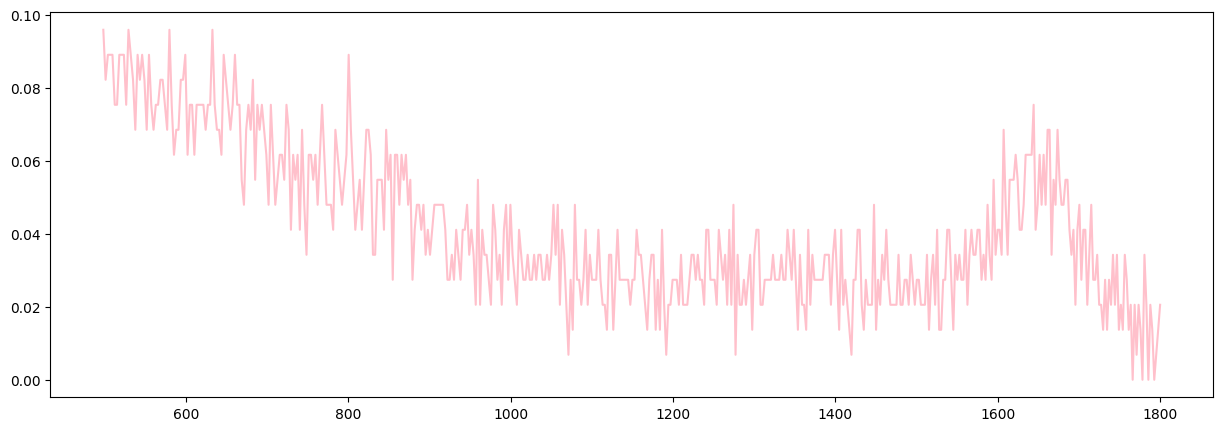

In [46]:
example_inds=[5000,3000,10000]
plot_num=1
fig, ax = plt.subplots(plot_num,figsize=(15, 5))

index = example_inds[2]
#plt.plot(net_input[index],label='Input noisy')
ax.plot(wavenumbers, np.squeeze(network_pred_input[1]), label='Input noisy spectrum',color="pink")


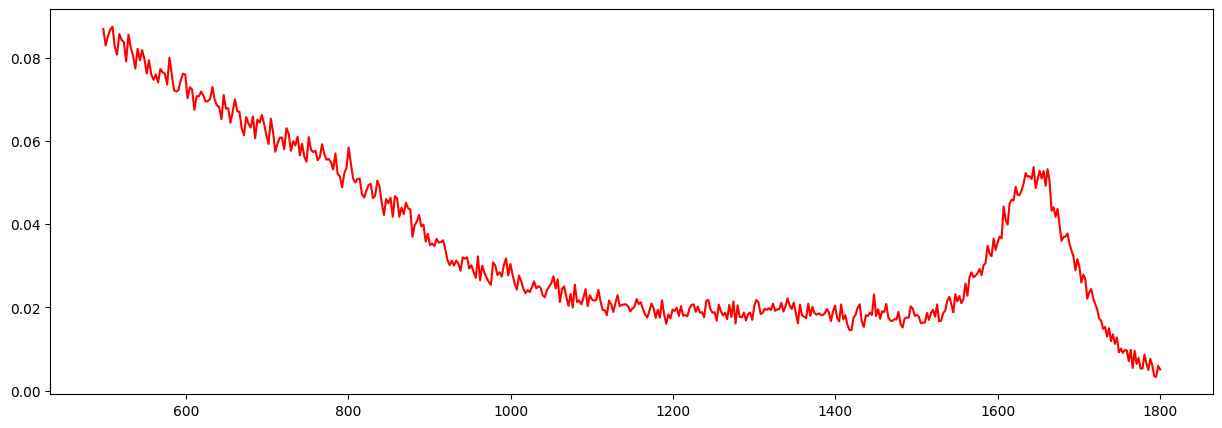

In [47]:
example_inds=[5000,3000,10000]
plot_num=1
fig, ax = plt.subplots(plot_num,figsize=(15, 5))

index = example_inds[2]
#plt.plot(net_input[index],label='Input noisy')
ax.plot(wavenumbers, np.squeeze(network_pred[1]), label='Network',color="red")


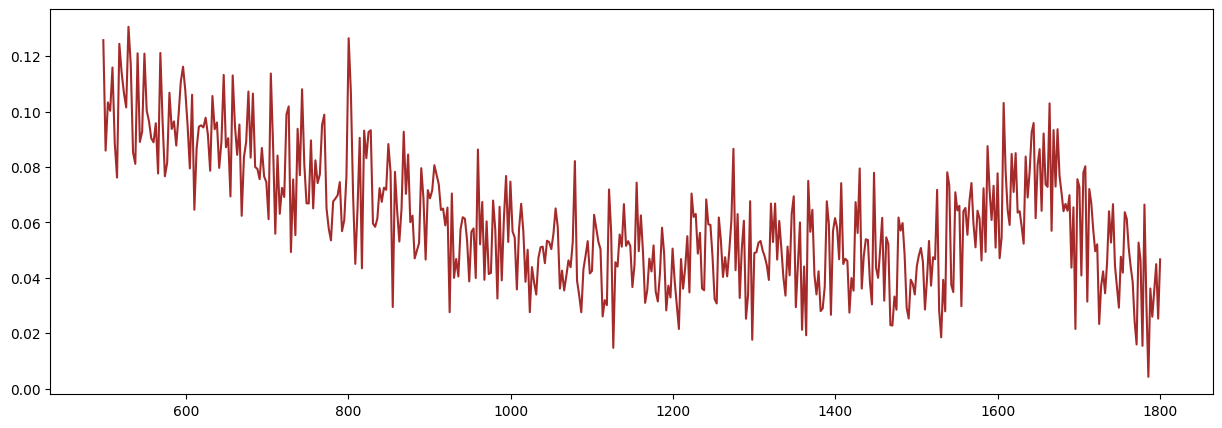

In [48]:
example_inds=[5000,3000,10000]
plot_num=1
fig, ax = plt.subplots(plot_num,figsize=(15, 5))

index = example_inds[2]
#plt.plot(net_input[index],label='Input noisy')
ax.plot(wavenumbers, np.squeeze(network_pred_input[1] + .04*np.random.rand(len(network_pred_input[1])) ), label='Input noisy spectrum',color="brown")


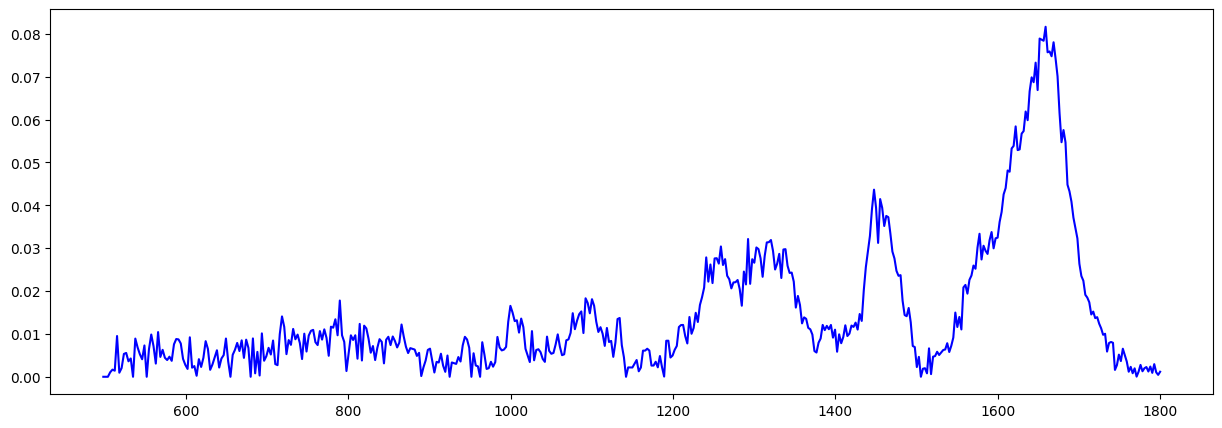

In [49]:
example_inds=[5000,3000,10000]
plot_num=1
fig, ax = plt.subplots(plot_num,figsize=(15, 5))

index = example_inds[2]
#plt.plot(net_input[index],label='Input noisy')
ax.plot(wavenumbers, np.squeeze(network_pred_GT[8000] ), label='Input noisy spectrum',color="blue")


In [50]:
# get cluster centres for test and validation sets

In [51]:
cluster_centres = kmeans_model.cluster_centers_

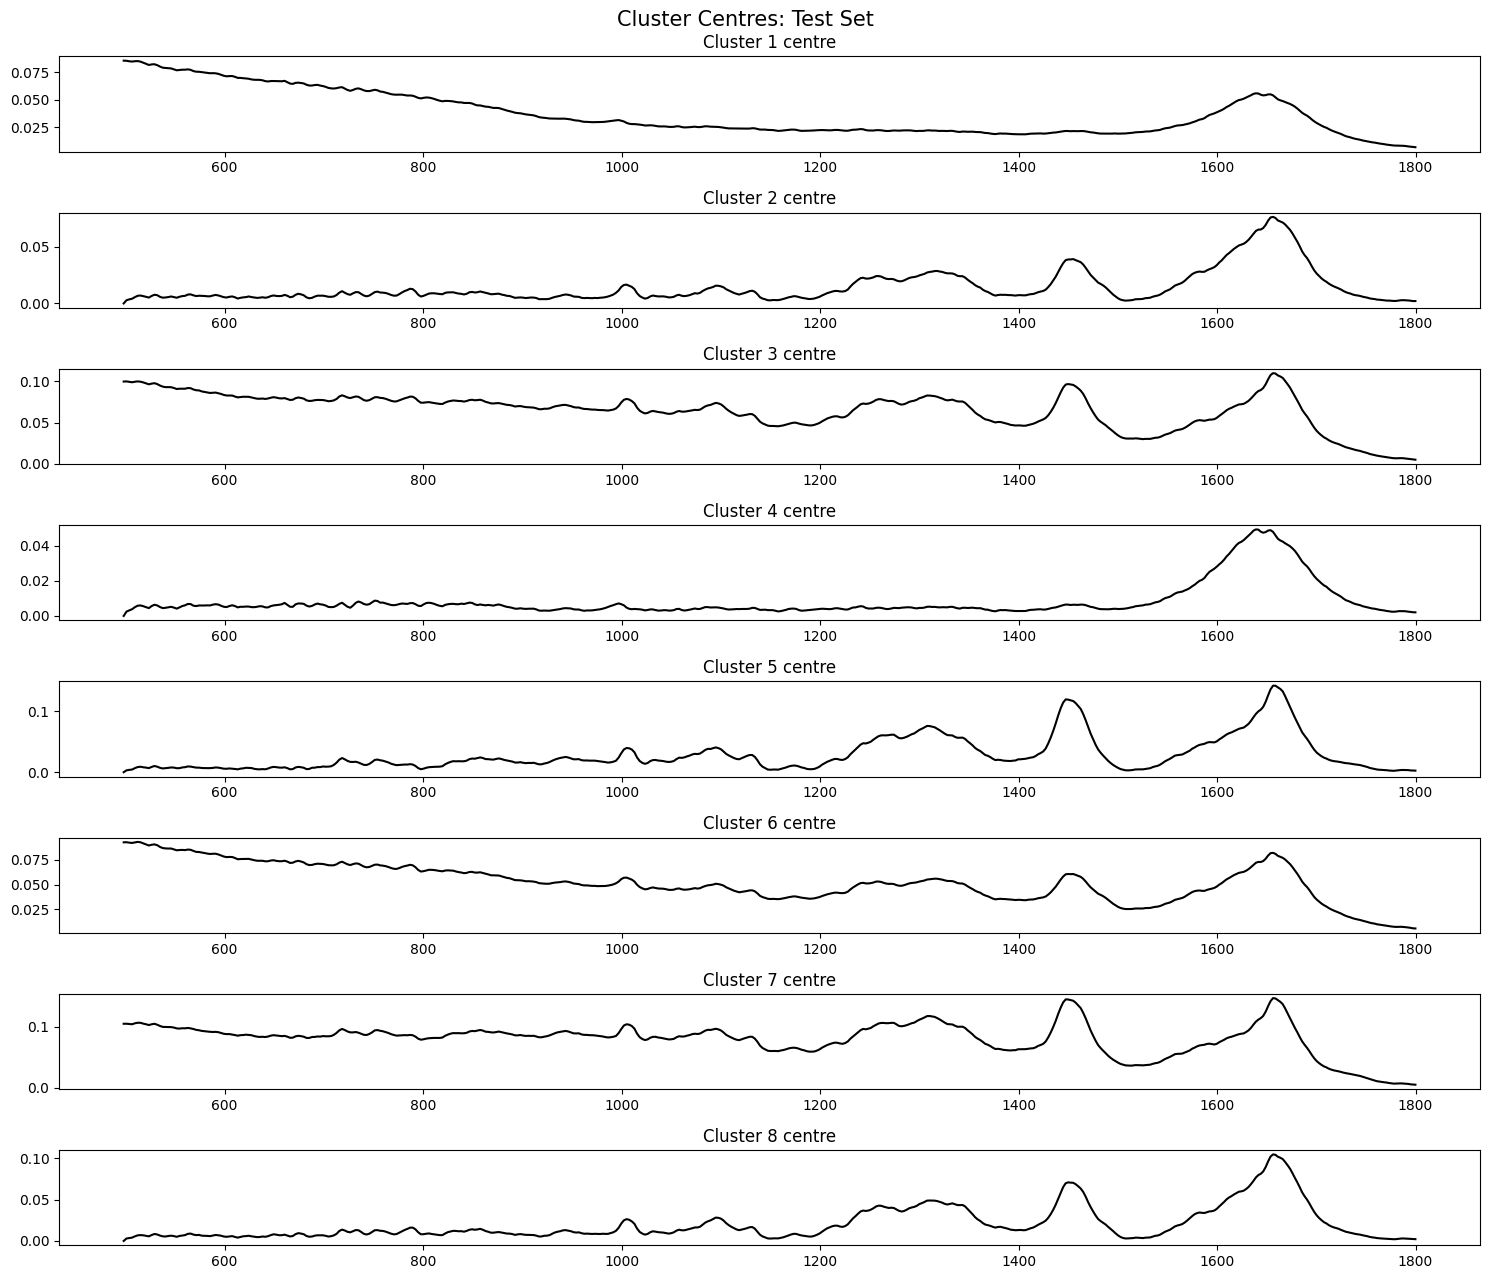

In [52]:
fig, ax = plt.subplots(np.shape(cluster_centres)[0],figsize=(15, 13))
for i in range(np.shape(cluster_centres)[0]):
    #plt.plot(net_input[index],label='Input noisy')
    ax[i].plot(wavenumbers, cluster_centres[i,:], color='black')
    ax[i].set_title('Cluster ' + str(i+1) + ' centre')
   
fig.suptitle('Cluster Centres: Test Set', fontsize = 15)
fig.tight_layout()

In [53]:
# get population of each cluster
for i in np.unique(labels):
    print(np.shape(np.where(labels == i)))

(1, 3045)
(1, 1276)
(1, 1435)
(1, 3057)
(1, 628)
(1, 1357)
(1, 510)
(1, 1386)


In [54]:
## for validation set

In [55]:
clean_va = np.load('ln_valid_set.npy')

cluster_valid_true = KMeans(8, random_state=4).fit(clean_va)

/home/ciaran/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
cluster_centres = cluster_valid_true.cluster_centers_
labels_valid_true = cluster_valid_true.labels_

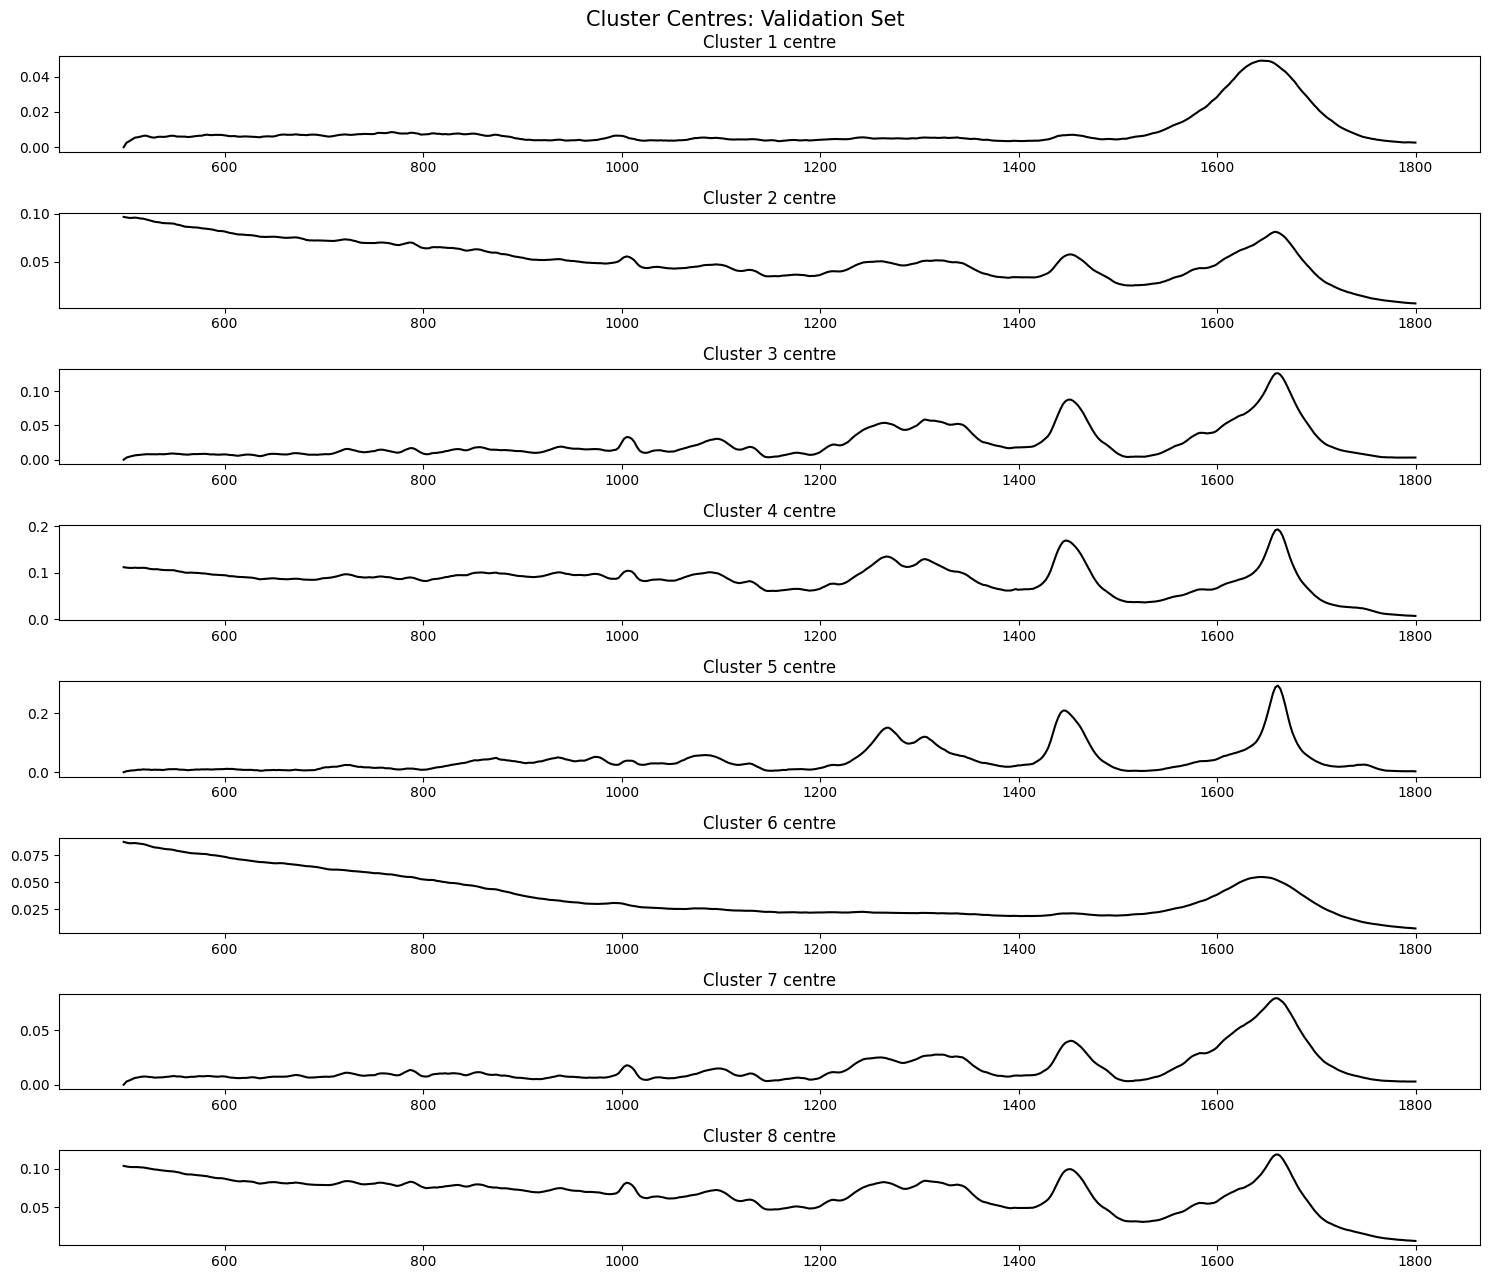

In [57]:
fig, ax = plt.subplots(np.shape(cluster_centres)[0],figsize=(15, 13))
for i in range(np.shape(cluster_centres)[0]):
    #plt.plot(net_input[index],label='Input noisy')
    ax[i].plot(wavenumbers, cluster_centres[i,:], color='black')
    ax[i].set_title('Cluster ' + str(i+1) + ' centre')
   
fig.suptitle('Cluster Centres: Validation Set', fontsize = 15)
fig.tight_layout()

In [58]:
# get population of each cluster
for i in np.unique(labels_valid_true):
    print(np.shape(np.where(labels_valid_true == i)))

(1, 4863)
(1, 1682)
(1, 1173)
(1, 311)
(1, 107)
(1, 4821)
(1, 1836)
(1, 1169)
